# Credit Card Fraud Detection

## Part 1: Data preprocessing

Dataset taken from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importing the libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration

In [4]:
# import the dataset
dataset = pd.read_csv('data/creditcard.csv')

In [5]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
dataset.shape

(284807, 31)

In [7]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# statistical summary
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Dealing with missing values

In [12]:
dataset.isnull().values.sum()

0

### Encoding categorical data

In [13]:
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [14]:
len(dataset.select_dtypes(include='object').columns)

0

### Counplot

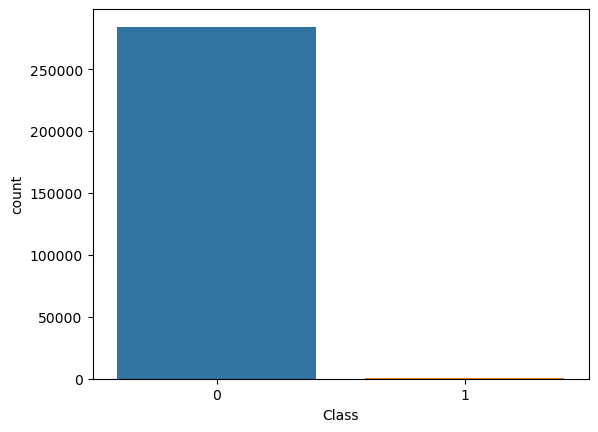

In [18]:
sns.countplot(x=dataset['Class']);

In [20]:
# non fraud transactions
(dataset.Class == 0).sum()

284315

In [21]:
# fraud transactions
(dataset.Class == 1).sum()

492

### Correlation matrix

In [22]:
dataset_2 = dataset.drop('Class', axis=1)

<AxesSubplot: title={'center': 'Correlated with Class'}>

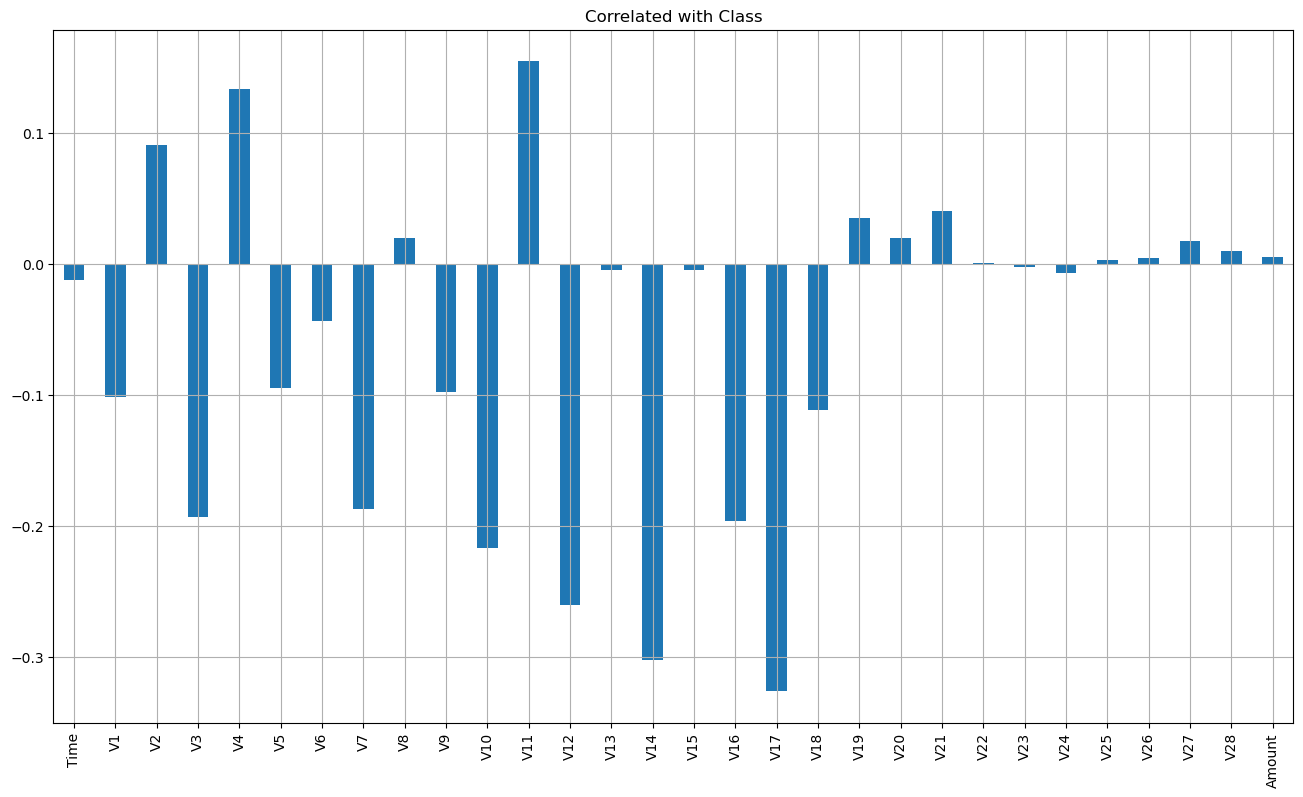

In [23]:
dataset_2.corrwith(dataset['Class']).plot.bar(figsize=(16,9), title='Correlated with Class', grid=True)

### Splitting the dataset

In [29]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [30]:
# features
X = dataset.drop('Class', axis=1)

In [31]:
# target
y = dataset['Class']

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

### Feature scaling

In [35]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
X_train

array([[-0.87750986, -0.57177938,  0.62828369, ...,  0.57377804,
        -0.2196612 , -0.30511629],
       [-1.15308534,  0.62679248, -0.08362249, ..., -0.17091545,
         0.00631402, -0.25423683],
       [ 1.26383162,  0.98361214, -0.1198731 , ...,  0.13283995,
        -0.10128286, -0.32950779],
       ...,
       [-0.38349503,  0.77210803, -0.57499928, ..., -0.00209668,
         0.01184758, -0.21662151],
       [ 0.05096267,  0.91851362, -1.02985151, ..., -0.08231776,
        -0.10081197,  0.33333622],
       [-0.41989457, -0.30294167,  0.45385207, ...,  0.21715744,
         0.36857129, -0.29286006]])

In [37]:
X_test

array([[ 0.65238668, -0.16686457,  0.64154241, ...,  0.27172397,
         0.50280513, -0.19606009],
       [ 1.31372573, -0.18035885,  0.56586861, ...,  0.19283776,
         0.54777109, -0.34934352],
       [ 1.21343225, -0.82732765, -1.45828848, ...,  0.7146577 ,
         1.36386022,  0.02971246],
       ...,
       [ 0.89086789,  0.57407801, -1.38701874, ..., -0.5986488 ,
        -0.02294377,  1.99397392],
       [ 1.39073528,  1.05455377,  0.17341371, ..., -0.2555804 ,
        -0.19207626, -0.34543281],
       [ 1.22637946,  1.20109412, -0.80279701, ...,  0.01953937,
        -0.16055905, -0.2968514 ]])

## Part 2: Building the model

### 1) LogisticRegression

In [65]:
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [66]:
y_pred = classifier_lr.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score for LR:', acc*100)

Accuracy score for LR: 99.91924440855307


In [69]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix for LR:\n', cm)

Confusion matrix for LR:
 [[56852     9]
 [   37    64]]


### 2) RandomForest

In [70]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [75]:
y_pred = classifier_rf.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score for RF:', acc*100)

Accuracy score for RF: 99.94908886626172


In [79]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix for RF:\n', cm)

Confusion matrix for RF:
 [[56854     7]
 [   22    79]]


### 3) XGBoost classifier

In [81]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [82]:
y_pred = classifier_xgb.predict(X_test)

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [89]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy score for XGB:', acc*100)

Accuracy score for XGB: 99.96137776061234


In [87]:
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion matrix for XGB:\n', cm)

Confusion matrix for XGB:
 [[56856     5]
 [   17    84]]


### XGboost shows the best result out of all three models

### Part 4: Save the model to a pickle file and open it to predict on a single observation

In [98]:
single_obs = [[0.00000000e+00, -1.35980713e+00, -7.27811733e-02,  2.53634674e+00,
        1.37815522e+00, -3.38320770e-01,  4.62387778e-01,  2.39598554e-01,
        9.86979013e-02,  3.63786970e-01,  9.07941720e-02, -5.51599533e-01,
       -6.17800856e-01, -9.91389847e-01, -3.11169354e-01,  1.46817697e+00,
       -4.70400525e-01,  2.07971242e-01,  2.57905802e-02,  4.03992960e-01,
        2.51412098e-01, -1.83067779e-02,  2.77837576e-01, -1.10473910e-01,
        6.69280749e-02,  1.28539358e-01, -1.89114844e-01,  1.33558377e-01,
       -2.10530535e-02,  1.49620000e+02]]

In [99]:
classifier_xgb.predict(sc.transform(single_obs))

c:\Users\andre\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])

In [100]:
import pickle

with open('classifier_xgb.pkl', 'wb') as f:
    pickle.dump(classifier_xgb, f)

In [101]:
with open('classifier_xgb.pkl', 'rb') as f:
    model = pickle.load(f)

In [102]:
model.predict(sc.transform(single_obs))

c:\Users\andre\miniconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])